In [22]:
# Bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from numpy.linalg import inv

In [23]:
# Leitura dos dados
df = pd.read_excel("Seno.xlsx")

x = df["x"].values
y = df["y"].values

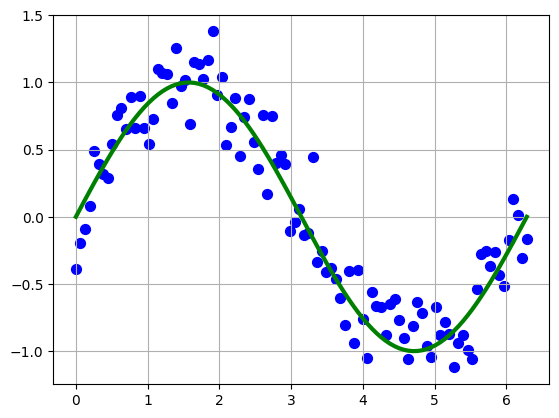

In [24]:
# Gráfico inicial
plt.scatter(x, y, color="blue", label="Dados", s=50)
plt.plot(x, np.sin(x), color="green", linewidth=3, label="sin(x)")
plt.grid(True)

Objetivo da regularização: evitar overfitting
* O overfitting acontece quando o modelo se ajusta demais aos dados de treino, capturando ruídos e padrões irreais
* A regularização penaliza coeficientes muito grandes, tornando o modelo mais estável e generalizável.

Ridge (ou regularização L2): modifica a função custo do modelo linear, somando uma penalidade proporcional ao quadrado dos coeficientes: $custo\_ridge = SSE + \lambda\sum_{p}^{j=1}\beta^2_j$, onde $\lambda$ é o parâmetro de regularização (quanto maior, mais penaliza) e o intercepto $beta_0$ não é penalizado normalmente. O resultado é que os coeficientes do modelo ficam menores, evitando oscilações exageradas do polinômio e melhorando a capacidade de generalização.

Em resumo, o ridge mantém o modelo previsível e robusto, evitando que polinômios de alto grau se tornem instáveis ou exageradamente sensíveis aos dados de treino.

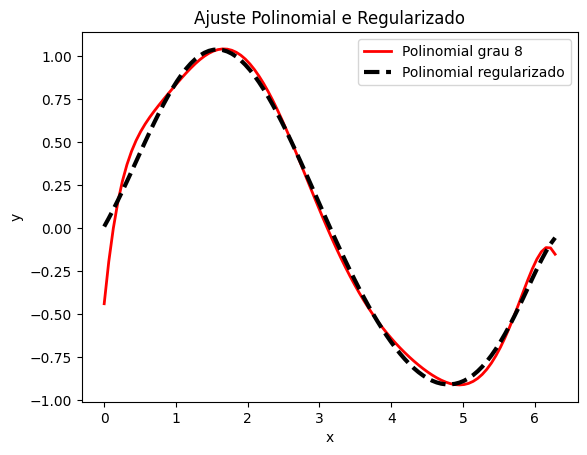

In [25]:
# Ajuste de modelo polinomial (grau 8)
poly = PolynomialFeatures(degree=8, include_bias=True)
X_poly = poly.fit_transform(x.reshape(-1,1))

# Coeficientes via mínimos quadrados
beta_mq = inv(X_poly.T @ X_poly) @ X_poly.T @ y
y_pred_poly = X_poly @ beta_mq
plt.plot(x, y_pred_poly, color="red", linewidth=2, label="Polinomial grau 8")

# Ajuste com regularização (Ridge manual)
lambda_reg = 0.5
I = np.eye(X_poly.shape[1])
I[0,0] = 0  # não regulariza o intercepto

# Solução regularizada: (X^T X + lambda*I)^(-1) X^T y
beta_ridge = inv(X_poly.T @ X_poly + lambda_reg * I) @ X_poly.T @ y
y_pred_ridge = X_poly @ beta_ridge
plt.plot(x, y_pred_ridge, color="black", linewidth=3, linestyle="--", label="Polinomial regularizado")

# Finaliza gráfico
plt.xlabel("x")
plt.ylabel("y")
plt.title("Ajuste Polinomial e Regularizado")
plt.legend()
plt.show()

In [26]:
# Imprime os coeficientes
print("Coeficientes polinomial grau 8 (MQO):", beta_mq)
print("Coeficientes polinomial regularizado:", beta_ridge)

Coeficientes polinomial grau 8 (MQO): [-4.39384903e-01  4.30652948e+00 -7.65645648e+00  8.06195031e+00
 -4.72014023e+00  1.53870532e+00 -2.80605226e-01  2.68657703e-02
 -1.05250429e-03]
Coeficientes polinomial regularizado: [ 9.73255965e-03  7.41640593e-01  3.24443450e-01 -7.78886404e-02
 -2.77087443e-01  1.57771292e-01 -3.59691114e-02  3.88571733e-03
 -1.64847171e-04]


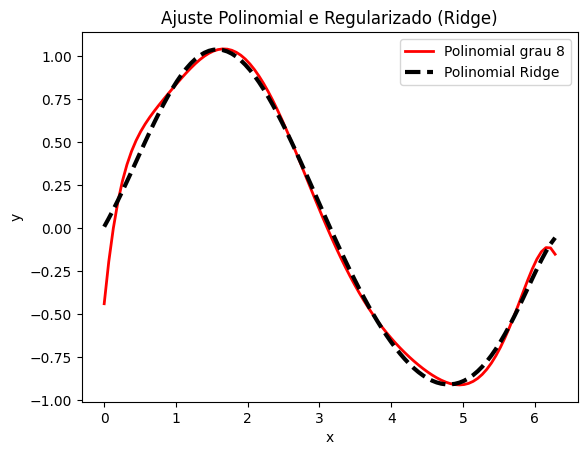

Coeficientes polinomial grau 8 (MQO): [-4.39383329e-01  4.30652535e+00 -7.65644747e+00  8.06194044e+00
 -4.72013453e+00  1.53870348e+00 -2.80604893e-01  2.68657385e-02
 -1.05250305e-03]
Coeficientes polinomial regularizado (Ridge): [ 8.96383619e-03  7.42824174e-01  3.24217303e-01 -7.81748633e-02
 -2.76977772e-01  1.57783559e-01 -3.59808055e-02  3.88768692e-03
 -1.64954113e-04]


In [27]:
# Usando o Ridge do scikit-learn, que implementa regularização L2 de forma estável e automática, sem precisar fazer inversão de matriz manualmente

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression

# Ajuste de modelo polinomial (grau 8) via MQO
X_poly = poly.fit_transform(x.reshape(-1, 1))

lin_reg = LinearRegression(fit_intercept=False)  # intercepto já incluído na matriz polinomial
lin_reg.fit(X_poly, y)
y_pred_poly = lin_reg.predict(X_poly)
plt.plot(x, y_pred_poly, color="red", linewidth=2, label="Polinomial grau 8")

# Ajuste com regularização Ridge
lambda_reg = 0.5
ridge_reg = Ridge(alpha=lambda_reg, fit_intercept=False)  # alpha = lambda
ridge_reg.fit(X_poly, y)
y_pred_ridge = ridge_reg.predict(X_poly)
plt.plot(x, y_pred_ridge, color="black", linewidth=3, linestyle="--", label="Polinomial Ridge")

# Finaliza gráfico
plt.xlabel("x")
plt.ylabel("y")
plt.title("Ajuste Polinomial e Regularizado (Ridge)")
plt.legend()
plt.show()

# Coeficientes
print("Coeficientes polinomial grau 8 (MQO):", lin_reg.coef_)
print("Coeficientes polinomial regularizado (Ridge):", ridge_reg.coef_)

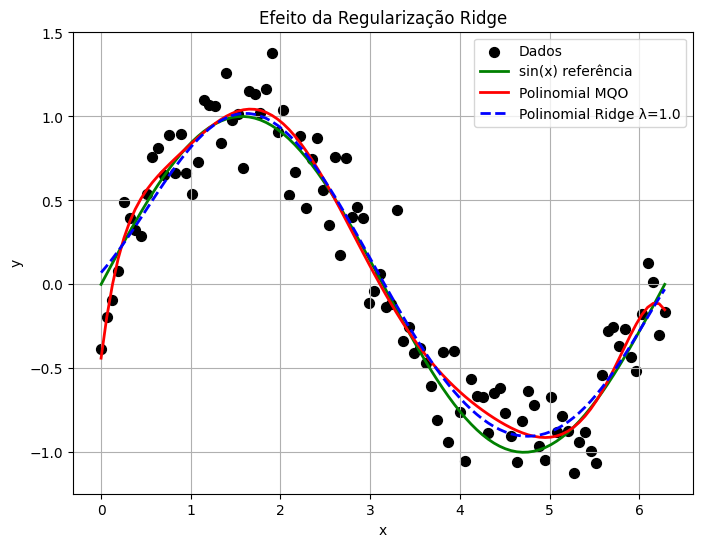

Coeficientes polinomial MQO vs Ridge:
        MQO     Ridge
0 -0.439383  0.069984
1  4.306525  0.618277
2 -7.656447  0.321809
3  8.061940 -0.048903
4 -4.720135 -0.248213
5  1.538703  0.128359
6 -0.280605 -0.026892
7  0.026866  0.002683
8 -0.001053 -0.000106


In [28]:
# --- Leitura dos dados ---
df = pd.read_excel("Seno.xlsx")
x = df["x"].values.reshape(-1,1)
y = df["y"].values

# --- Matriz polinomial ---
degree = 8
poly = PolynomialFeatures(degree=degree, include_bias=True)
X_poly = poly.fit_transform(x)

# --- Modelo sem regularização (MQO) ---
lin_reg = LinearRegression(fit_intercept=False)
lin_reg.fit(X_poly, y)
y_pred_poly = lin_reg.predict(X_poly)

# --- Modelo com regularização Ridge ---
lambda_reg = 1.0
ridge_reg = Ridge(alpha=lambda_reg, fit_intercept=False)
ridge_reg.fit(X_poly, y)
y_pred_ridge = ridge_reg.predict(X_poly)

# --- Gráfico das curvas ---
plt.figure(figsize=(8,6))
plt.scatter(x, y, color="black", label="Dados", s=50)
plt.plot(x, np.sin(x), color="green", linewidth=2, label="sin(x) referência")
plt.plot(x, y_pred_poly, color="red", linewidth=2, label="Polinomial MQO")
plt.plot(x, y_pred_ridge, color="blue", linewidth=2, linestyle="--", label=f"Polinomial Ridge λ={lambda_reg}")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Efeito da Regularização Ridge")
plt.legend()
plt.grid(True)
plt.show()

# --- Comparação dos coeficientes ---
coef_df = pd.DataFrame({
    "MQO": lin_reg.coef_,
    "Ridge": ridge_reg.coef_
})
print("Coeficientes polinomial MQO vs Ridge:")
print(coef_df)